In [5]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd


LOAD THE DATASET

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape 

(dtype('uint8'), (60000, 28, 28), dtype('uint8'), (60000,))

MAKE DATA COMPATIBLE WITH KERAS

In [8]:
x_train = np.expand_dims(x_train, axis = -1).astype('float32')
x_test = np.expand_dims(x_test, axis = -1).astype('float32')
y_train = np.expand_dims(y_train, axis = -1)
y_test = np.expand_dims(y_test, axis = -1)

In [9]:
x_train.dtype, x_train.shape, y_train.dtype, y_train.shape 

(dtype('float32'), (60000, 28, 28, 1), dtype('uint8'), (60000, 1))

In [10]:
train = (x_train, y_train)
test = (x_test, y_test)

In [11]:
import matplotlib.pyplot as plt

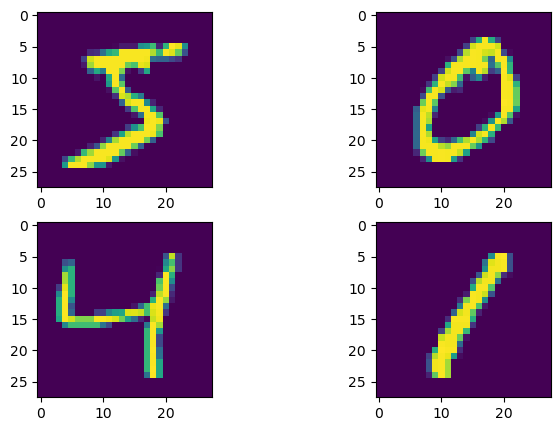

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (8, 5))
for i in range(len(axes)):
    for j in range(len(axes)):
        axes[i][j].imshow(train[0][i*len(axes)+j])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

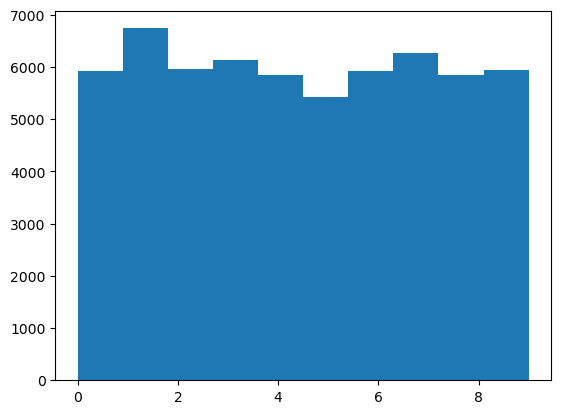

In [13]:
plt.hist(y_train)

## SET UP THE MODEL

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    layers.Conv2D(3, 3, activation = "relu"),
    layers.Conv2D(3, 3, activation = "relu"),
    layers.Conv2D(3, 3, activation = "relu"),
    layers.Flatten(),
    layers.Dense(10, activation = "softmax")
])
model.summary()

In [ ]:
inputs = layers.Input(shape = (train[0][0].shape))
x = layers.Conv2D(3, 3, activation = "relu")(inputs)
x = layers.Conv2D(3, 3, activation = "relu")(x)
x = layers.Conv2D(3, 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()